In [27]:
library("here")
library(devtools)
library(Seurat)

load_all('/home/jpm73279/Socrates')



# bed <- system.file("extdata", "test.tn5.bed.gz", package = "Socrates")
#ann <- system.file("extdata", "gencode.v19.annotation.gff3.gz", package = "Socrates")
#chr <- system.file("extdata", "hg19.txt", package = "Socrates")

reference_genome_path <- "/home/jpm73279/genome_downloads/Pmiliaceum/"
analysis_path <- "/scratch/jpm73279/comparative_single_cell/01.alignments_annotations/proso_millet_second_batch/"

# set-up arguments

#ann <- "Zm-B73-REFERENCE-NAM-5.0_Zm00001eb.1.nuclear.gff3"
#chr <- "Zm-B73-REFERENCE-NAM-5.0.chrom.size"
#pre <- "Sb.Leaf_rep1"
#output <- as.character(args[5])

ann <- paste0(reference_genome_path,"Pmiliaceum.gff")
chr <- paste0(reference_genome_path,"pm_genmap_output.chrom.sizes")



ℹ Loading Socrates

Warning message:
"replacing previous import 'scales::viridis_pal' by 'viridis::viridis_pal' when loading 'Socrates'"


## Full Replicate Analysis

In [28]:
output_path <- "/scratch/jpm73279/comparative_single_cell/02.QC_clustering/proso_millet_v2/"
output_path_imgs <- "/scratch/jpm73279/comparative_single_cell/02.QC_clustering/proso_millet_v2/QC_output/imgs/"

pre <- "Proso_millet.sciATAC.JP"



Proso_millet.rep1 <- paste0(analysis_path, "Proso_JP1.unique.mpq10.tn5.bed")

#Load Object
Proso_millet.leaf.rep1 <- loadBEDandGenomeData(Proso_millet.rep1, ann, chr)
#zea_m.rep.peaks  <- paste0(pre, "macs2_temp", sep=".")

# call ACRs
sb_temp_dir <- paste0(analysis_path, paste0(pre, "peaks.tmp"))
Proso_millet.leaf.rep1.acrs <- callACRs(Proso_millet.leaf.rep1, genomesize= 7.2e8,
                shift= -50,
                extsize=100,
                fdr=0.05,
                tempdir=sb_temp_dir,
                verbose=T)

Proso_millet.leaf.rep1.meta <- buildMetaData(Proso_millet.leaf.rep1.acrs,
                                     tss.window=1000,
                                     verbose=TRUE)

Running pre-check on input files and executable paths ...

BED file path = /scratch/jpm73279/comparative_single_cell/01.alignments_annotations/proso_millet_second_batch/Proso_JP1.unique.mpq10.tn5.bed ... ok

GFF file path = /home/jpm73279/genome_downloads/Pmiliaceum/Pmiliaceum.gff ... ok

Chromosome sizes file path = /home/jpm73279/genome_downloads/Pmiliaceum/pm_genmap_output.chrom.sizes ... ok

Macs2 is installed .... ok

 - loading data (this may take a while for big BED files) ...

 - finished loading data

 - running MACS2 on bulk BED file ...

Warning message in dir.create(mac2temp):
"'/scratch/jpm73279/comparative_single_cell/01.alignments_annotations/proso_millet_second_batch/Proso_millet.sciATAC.JPpeaks.tmp' already exists"
 - counting Tn5 sites per barcode ...

 - counting Tn5 sites at TSSs per barcode ...

 - counting Tn5 sites within ACRs per barcode ...

 - finalizing meta data creation ...

   ~ returning metadata ...



Making Dotplot



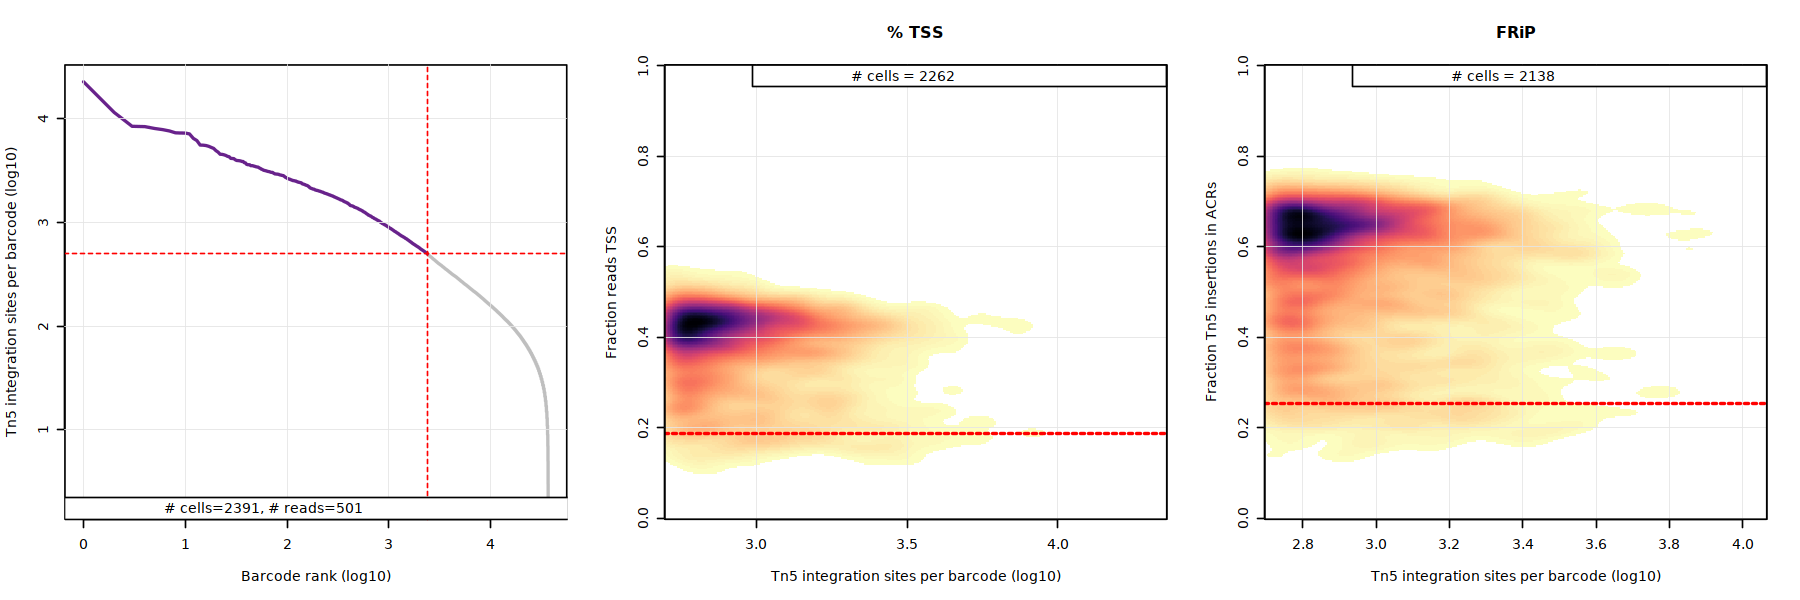

In [29]:
library(repr)

options(repr.plot.width=15, repr.plot.height=5)
Proso_millet.leaf.rep1.meta_file <- findCells(Proso_millet.leaf.rep1.meta,
                                        doplot=T,
                                        set.tn5.cutoff=500,
                                        max.cells=15000,
                                        min.tn5=500,
                                        filt.tss=TRUE,
                                        filt.frip=TRUE,
                                        #tss.z.thresh=3,
                                        tss.min.freq=.15,
                                        frip.min.freq=.25,
                                        filt.org = FALSE,
                                        prefix=NULL)

In [30]:
options(repr.plot.width=25, repr.plot.height=10)
Proso_millet.leaf.rep1.meta_file <- findCells(Proso_millet.leaf.rep1.meta,
                                        doplot=T,
                                        set.tn5.cutoff=500,
                                        max.cells=15000,
                                        min.tn5=500,
                                        filt.tss=TRUE,
                                        filt.frip=TRUE,
                                        #tss.z.thresh=3,
                                        tss.min.freq=.15,
                                        frip.min.freq=.25,
                                        filt.org = FALSE,
                                        prefix=paste0(output_path_imgs, pre))

Making Dotplot



In [31]:
# generate sparse matrix
Proso_millet.leaf.rep1.meta_file.filtered <- generateMatrix(Proso_millet.leaf.rep1.meta_file,
                            filtered=T,
                            windows=500,
                            peaks=F,
                            verbose=T)


# convert to Socrates format for downstream analysis.-
sb_leaf_rep_1.filtered.sparse <- convertSparseData(Proso_millet.leaf.rep1.meta_file.filtered,
                             verbose=T)

#pre <- "Zea_mays_tis_crown_root_rep_1"
sb.obj.leaf_rep_1.save  <- paste0(output_path,"QC_output/",pre, "_QC_obj.rds")
sb.soc.leaf_rep_1.save  <- paste0(output_path,"QC_output/",pre, "_QC_soc_obj.rds")


# save QC object
saveRDS(Proso_millet.leaf.rep1.meta_file.filtered, file=sb.obj.leaf_rep_1.save)
saveRDS(sb_leaf_rep_1.filtered.sparse, file=sb.soc.leaf_rep_1.save)

 - converting triplet format to sparseMatrix



In [32]:
library(tidyverse)
as_tibble(sb_leaf_rep_1.filtered.sparse$meta)  %>% 
    summarise(total_m = mean(total, na.rm = TRUE),
             total_tss = mean(tss, na.rm = TRUE),
             total_acrs = mean(acrs, na.rm = TRUE),
             total_nsites = mean(nSites, na.rm = TRUE))

total_m,total_tss,total_acrs,total_nsites
<dbl>,<dbl>,<dbl>,<dbl>
1023.655,399.1394,570.1113,597.8952


### Replicate 2

In [22]:
output_path <- "/scratch/jpm73279/comparative_single_cell/02.QC_clustering/proso_millet_v2/"
output_path_imgs <- "/scratch/jpm73279/comparative_single_cell/02.QC_clustering/proso_millet_v2/QC_output/imgs/"

pre <- "Proso_millet.sciATAC.sz"



Proso_millet.rep1 <- paste0(analysis_path, "Proso_szP1.unique.mpq10.tn5.bed")

#Load Object
Proso_millet.leaf.rep1 <- loadBEDandGenomeData(Proso_millet.rep1, ann, chr)
#zea_m.rep.peaks  <- paste0(pre, "macs2_temp", sep=".")

# call ACRs
sb_temp_dir <- paste0(analysis_path, paste0(pre, "peaks.tmp"))
Proso_millet.leaf.rep1.acrs <- callACRs(Proso_millet.leaf.rep1, genomesize= 7.2e8,
                shift= -50,
                extsize=100,
                fdr=0.05,
                tempdir=sb_temp_dir,
                verbose=T)

Proso_millet.leaf.rep1.meta <- buildMetaData(Proso_millet.leaf.rep1.acrs,
                                     tss.window=1000,
                                     verbose=TRUE)

Running pre-check on input files and executable paths ...

BED file path = /scratch/jpm73279/comparative_single_cell/01.alignments_annotations/proso_millet_second_batch/Proso_szP1.unique.mpq10.tn5.bed ... ok

GFF file path = /home/jpm73279/genome_downloads/Pmiliaceum/Pmiliaceum.gff ... ok

Chromosome sizes file path = /home/jpm73279/genome_downloads/Pmiliaceum/pm_genmap_output.chrom.sizes ... ok

Macs2 is installed .... ok

 - loading data (this may take a while for big BED files) ...

 - finished loading data

 - running MACS2 on bulk BED file ...

Warning message in dir.create(mac2temp):
"'/scratch/jpm73279/comparative_single_cell/01.alignments_annotations/proso_millet_second_batch/Proso_millet.sciATAC.szpeaks.tmp' already exists"
 - counting Tn5 sites per barcode ...

 - counting Tn5 sites at TSSs per barcode ...

 - counting Tn5 sites within ACRs per barcode ...

 - finalizing meta data creation ...

   ~ returning metadata ...



Making Dotplot



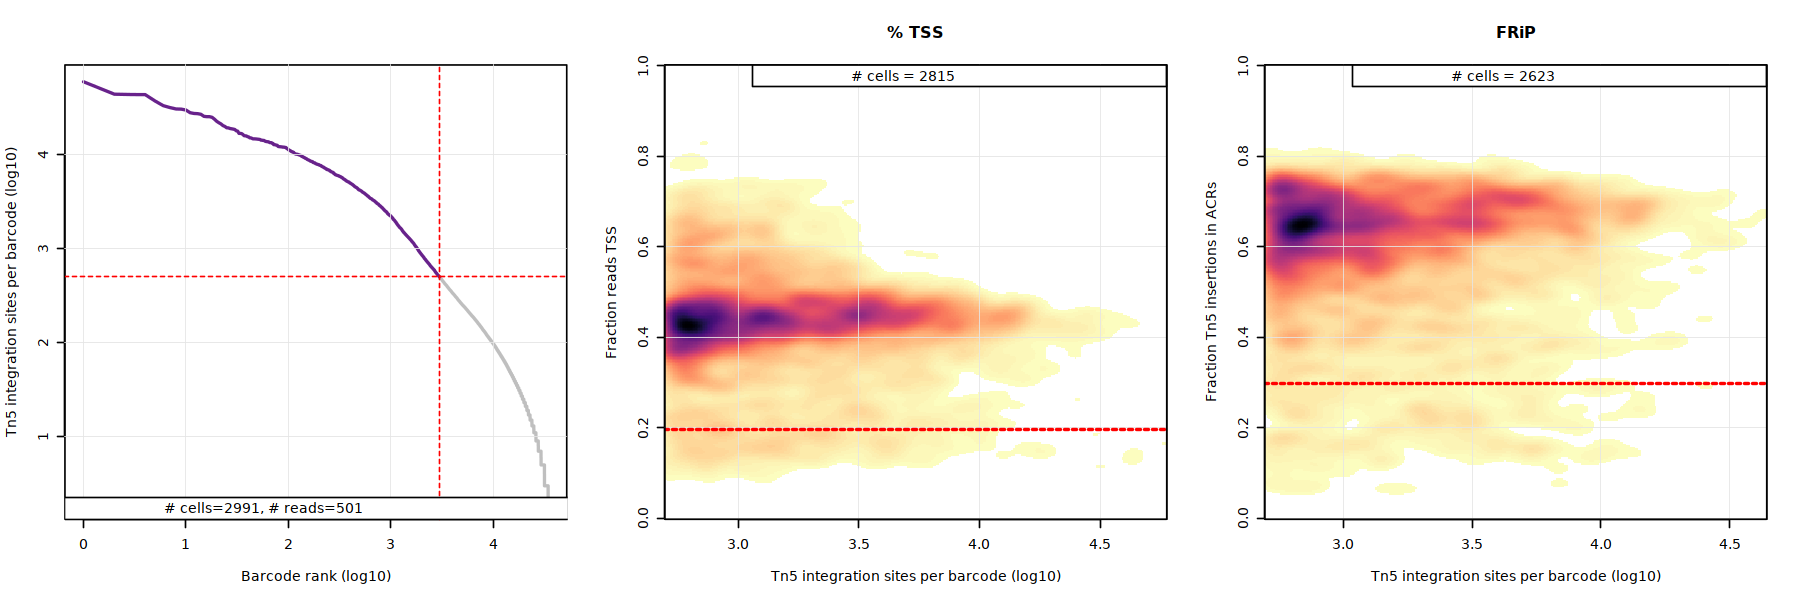

In [23]:
options(repr.plot.width=15, repr.plot.height=5)
Proso_millet.leaf.rep1.meta_file <- findCells(Proso_millet.leaf.rep1.meta,
                                        doplot=T,
                                        set.tn5.cutoff=500,
                                        max.cells=15000,
                                        min.tn5=500,
                                        filt.tss=TRUE,
                                        filt.frip=TRUE,
                                        #tss.z.thresh=3,
                                        tss.min.freq=.15,
                                        frip.min.freq=.25,
                                        filt.org = FALSE,
                                        prefix=NULL)

In [24]:
options(repr.plot.width=25, repr.plot.height=10)
Proso_millet.leaf.rep1.meta_file <- findCells(Proso_millet.leaf.rep1.meta,
                                        doplot=T,
                                        set.tn5.cutoff=500,
                                        max.cells=15000,
                                        min.tn5=500,
                                        filt.tss=TRUE,
                                        filt.frip=TRUE,
                                        #tss.z.thresh=3,
                                        tss.min.freq=.15,
                                        frip.min.freq=.25,
                                        filt.org = FALSE,
                                        prefix=paste0(output_path_imgs, pre))

Making Dotplot



In [25]:
# generate sparse matrix
Proso_millet.leaf.rep1.meta_file.filtered <- generateMatrix(Proso_millet.leaf.rep1.meta_file,
                            filtered=T,
                            windows=500,
                            peaks=F,
                            verbose=T)


# convert to Socrates format for downstream analysis.-
sb_leaf_rep_1.filtered.sparse <- convertSparseData(Proso_millet.leaf.rep1.meta_file.filtered,
                             verbose=T)

#pre <- "Zea_mays_tis_crown_root_rep_1"
sb.obj.leaf_rep_1.save  <- paste0(output_path,"QC_output/",pre, "_QC_obj.rds")
sb.soc.leaf_rep_1.save  <- paste0(output_path,"QC_output/",pre, "_QC_soc_obj.rds")


# save QC object
saveRDS(Proso_millet.leaf.rep1.meta_file.filtered, file=sb.obj.leaf_rep_1.save)
saveRDS(sb_leaf_rep_1.filtered.sparse, file=sb.soc.leaf_rep_1.save)

 - converting triplet format to sparseMatrix



In [26]:
library(tidyverse)
as_tibble(sb_leaf_rep_1.filtered.sparse$meta)  %>% 
    summarise(total_m = mean(total, na.rm = TRUE),
             total_tss = mean(tss, na.rm = TRUE),
             total_acrs = mean(acrs, na.rm = TRUE),
             total_nsites = mean(nSites, na.rm = TRUE))

total_m,total_tss,total_acrs,total_nsites
<dbl>,<dbl>,<dbl>,<dbl>
2562.918,1130.14,1589.784,1258.693
